In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns


# Using Tensorflow Keras instead of the original Keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
bankdata=pd.read_csv('bank.csv')

In [3]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# read the head of the data
bankdata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Drop the columns which are unique for all users like IDs

In [5]:
# Drop the columns which are unique for all users like IDs

bankdata.drop(['RowNumber','Surname','CustomerId'],axis=1,inplace=True)

# Seperating the data into features and and target col(s)

In [6]:

#seperating the data into features and and target col(s)
X=bankdata.iloc[:, 0:10]
Y=bankdata.iloc[:, 10:]
bankdata_copy=bankdata.copy()
bankdata_copy=pd.get_dummies(bankdata_copy)

In [7]:
# Encoding the Geography and Gender columns
X=pd.get_dummies(X)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [8]:
#divide the data into train and test splits

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# Normalizing the training and test sets

In [9]:
#Normalizing the training and test sets
X_train= preprocessing.normalize(X_train)
X_test= preprocessing.normalize(X_test)

## CONVERTING DATA SETS TO TENSORS

In [10]:
#converting the data sets to tensors

X_train=tf.convert_to_tensor(X_train)
y_train=tf.convert_to_tensor(y_train.values)
X_test=tf.convert_to_tensor(X_test)
y_test=tf.convert_to_tensor(y_test.values)

In [134]:
#model building- lets initialize our model

model = Sequential()

# Define model architecture
# Using 2 hidden layers gives unrealiable outputs
#model.add(Dense(2,input_dim=13,activation='relu'))

# Using 3 hidden layers gives unrealiable outputs
#model.add(Dense(2,input_dim=13,activation='relu'))

# Using 4 hidden gives unrealiable outputs
#model.add(Dense(4,input_dim=13,activation='relu'))



# When the number of hidden layers is increased to 5, the output seems to be consistent
model.add(Dense(10000,input_dim=13,activation='relu'))
model.add(Dense(100,input_dim=13, activation='tanh'))
model.add(Dense(2,activation='softmax'))

In [135]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [136]:
model.fit(X_train, y_train, epochs=40, batch_size=256, verbose=1) 

Train on 8000 samples
Epoch 1/40
8000/8000 [==============================] - 7s 921us/sample - loss: 0.2814 - accuracy: 0.9379
Epoch 2/40
8000/8000 [==============================] - 3s 358us/sample - loss: 0.2819 - accuracy: 1.0000
Epoch 3/40
8000/8000 [==============================] - 3s 339us/sample - loss: 0.2816 - accuracy: 1.0000 - los
Epoch 4/40
8000/8000 [==============================] - 3s 341us/sample - loss: 0.2816 - accuracy: 1.0000
Epoch 5/40
8000/8000 [==============================] - 3s 341us/sample - loss: 0.2816 - accuracy: 1.0000
Epoch 6/40
8000/8000 [==============================] - 3s 360us/sample - loss: 0.2816 - accuracy: 1.0000
Epoch 7/40
8000/8000 [==============================] - 3s 361us/sample - loss: 0.2816 - accuracy: 1.0000
Epoch 8/40
8000/8000 [==============================] - 3s 353us/sample - loss: 0.2816 - accuracy: 1.0000
Epoch 9/40
8000/8000 [==============================] - 3s 344us/sample - loss: 0.2816 - accuracy: 1.0000
Epoch 10/40
8000/8

In [137]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 1.000
Loss: 0.288


In [142]:
model.add(Dense(1000,input_dim=13,activation='relu'))
model.add(Dense(500,input_dim=13, activation='relu'))
model.add(Dense(2,activation='softmax'))

In [143]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [155]:
model.fit(X_train, y_train, epochs=10, batch_size=200, verbose=1) 

Train on 8000 samples
Epoch 1/10
8000/8000 [==============================] - 5s 607us/sample - loss: 12.2389 - accuracy: 0.5000
Epoch 2/10
8000/8000 [==============================] - 4s 514us/sample - loss: 19.9617 - accuracy: 0.5250
Epoch 3/10
8000/8000 [==============================] - 4s 505us/sample - loss: 36.1224 - accuracy: 0.5000
Epoch 4/10
8000/8000 [==============================] - 4s 499us/sample - loss: 18.9068 - accuracy: 0.5000
Epoch 5/10
8000/8000 [==============================] - 4s 501us/sample - loss: 95.5793 - accuracy: 0.5250
Epoch 6/10
8000/8000 [==============================] - 4s 508us/sample - loss: 76.7313 - accuracy: 0.4750
Epoch 7/10
8000/8000 [==============================] - 4s 505us/sample - loss: 61.9050 - accuracy: 0.5250
Epoch 8/10
8000/8000 [==============================] - 4s 501us/sample - loss: 65.5282 - accuracy: 0.4750
Epoch 9/10
8000/8000 [==============================] - 4s 506us/sample - loss: 71.0133 - accuracy: 0.5000
Epoch 10/10
800

In [154]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 1.000
Loss: 19.985


In [157]:
y_predict = model.predict(X_test)
y_predict[0]

array([0., 1.], dtype=float32)

In [158]:
np.argmax(y_predict[0])

1

## CONFUSION MATRIX

[[   0 1585]
 [   0  415]]


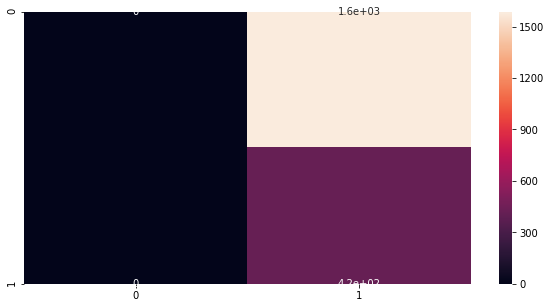

In [165]:
# mY CONFUSION MATRIX

y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(y_test,y_pred)

print(cm)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)